# Required Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
init_notebook_mode(connected=True)

# Look at The Data_Set :

In [59]:
#df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
#df_reviews.head()

In [3]:
df_apps = pd.read_csv("googleplaystore.csv")
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data_preprocessing_Steps/EDA :

In [4]:
categories = list(df_apps["Category"].unique())

In [5]:
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))

There are 33 categories! (Excluding/Removing Category 1.9)


In [6]:
print(categories)

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']


In [7]:
#Remove Category 1.9
categories.remove('1.9')

In [8]:
a = df_apps.loc[df_apps["Category"] == "1.9"]
#print(a)

In [9]:
#print(a.head())

In [10]:
a.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [60]:
print("This mislabeled app category affects {} app at index {}.".format(len(a),int(a.index.values)))

This mislabeled app category affects 1 app at index 10472.


In [12]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
df_apps['Rating'].isnull().sum()

1474

In [14]:
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

In [15]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
App               9367 non-null object
Category          9367 non-null object
Rating            9367 non-null float64
Reviews           9367 non-null object
Size              9367 non-null object
Installs          9367 non-null object
Type              9367 non-null object
Price             9367 non-null object
Content Rating    9366 non-null object
Genres            9367 non-null object
Last Updated      9367 non-null object
Current Ver       9363 non-null object
Android Ver       9364 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [16]:
layout = go.Layout(
    xaxis=dict(title='Ratings'),yaxis=dict(title='Number of Apps'))
data = [go.Histogram(x=df_apps["Rating"])]
#print(data)
# where x Sets the sample data to be binned on the x axis.
fig = go.Figure(data=data, layout=layout)
#print(fig)
iplot(fig, filename='basic histogram')

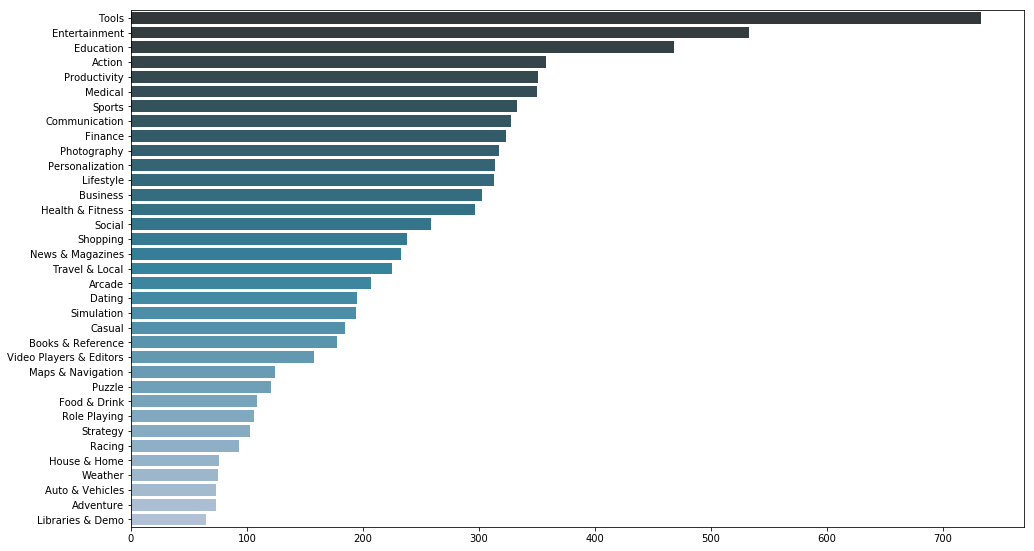

In [17]:
#Show top 35 app genres
#value_counts() function returns object containing counts of unique values in descending order.
plt.figure(figsize=(16, 9.5))
genres = df_apps["Genres"].value_counts()[:35]
#print(genres)
ax = sns.barplot(x=genres.values, y=genres.index, palette="PuBuGn_d")

# Which categories have the best overall rating? Also, which category has the most installs? Let's find out!

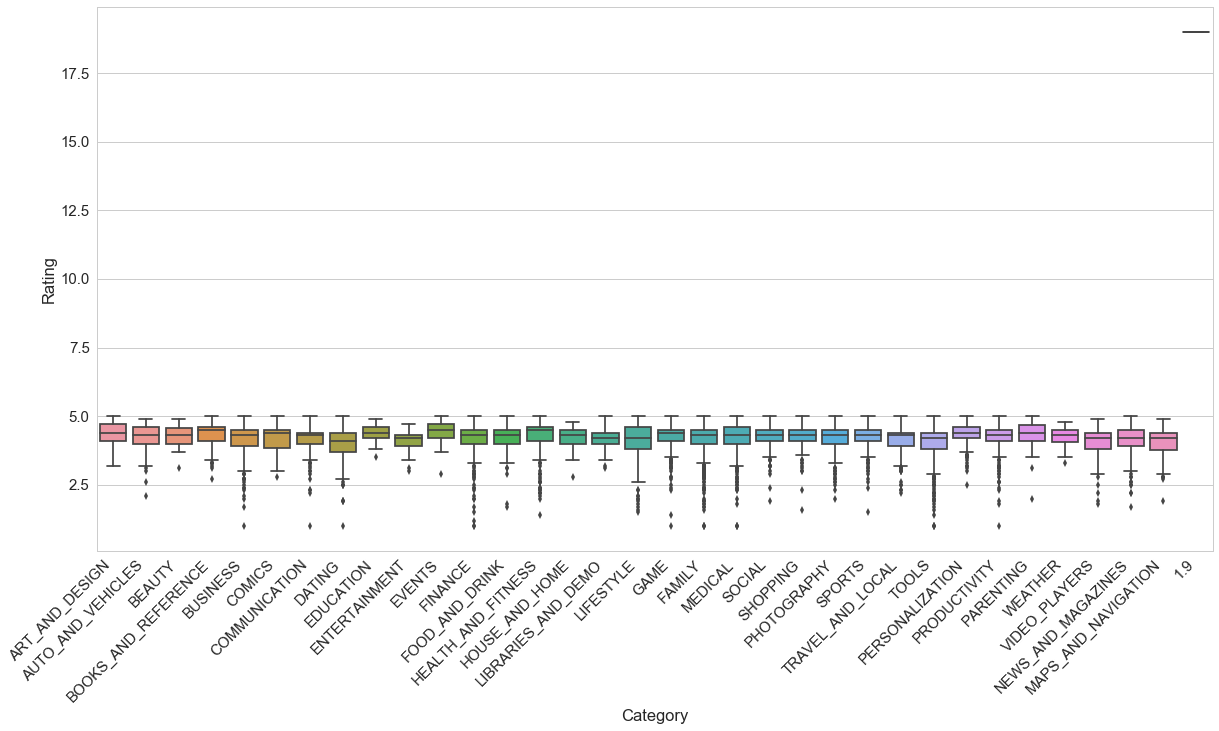

In [18]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df_apps)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

All of the categories have close rating averages. In order to further define which categories are the highest rated, we will only look at the data for each category that has more than or equal to 4.0 in rating.

In [19]:
#app categories which have the of high ratings
#Cut away rows which have < 4.0 ratings
##https://www.geeksforgeeks.org/python-list-copy-method/ "change in updation of current value not on adding any value"
highRating = df_apps.copy()
highRating = highRating.loc[highRating["Rating"] >= 4.0]
#highRateNum = highRating.groupby('Category').nunique()
highRateNum = highRating.groupby('Category')['Rating'].nunique()
highRateNum

Category
1.9                     1
ART_AND_DESIGN         10
AUTO_AND_VEHICLES       8
BEAUTY                 10
BOOKS_AND_REFERENCE    11
BUSINESS               11
COMICS                 10
COMMUNICATION          10
DATING                 11
EDUCATION              10
ENTERTAINMENT           8
EVENTS                 11
FAMILY                 11
FINANCE                11
FOOD_AND_DRINK         10
GAME                   11
HEALTH_AND_FITNESS     11
HOUSE_AND_HOME          9
LIBRARIES_AND_DEMO      9
LIFESTYLE              11
MAPS_AND_NAVIGATION    10
MEDICAL                11
NEWS_AND_MAGAZINES     11
PARENTING              11
PERSONALIZATION        11
PHOTOGRAPHY            11
PRODUCTIVITY           11
SHOPPING               10
SOCIAL                 11
SPORTS                 11
TOOLS                  11
TRAVEL_AND_LOCAL       10
VIDEO_PLAYERS          10
WEATHER                 9
Name: Rating, dtype: int64

There are many categories of apps that are equal in terms of being the highest rated. This is great, however, the interest should lie within the app categories which have the lowest number of high ratings. These poorly rated apps deserve more attention because if a new sleek new app in that category were to be put on the app store, then the developers could satisfy the demand for innovation in this area. In this case, The Categories of Importance are "AUTO_AND_VEHICLES"and "ENTERTAINMENT."

Now to analyze the apps which would produce the most ad revenue

One parameter that would affect ad revenue the most is the number of installs an app has. More installs means more people are opening the app and viewing the embedded ads, hence, there is more money being made. A free application may lead to more installs, however, other parameters may alter how many installs an app will have. Let's see if there is a correlation between installs and other parameters!


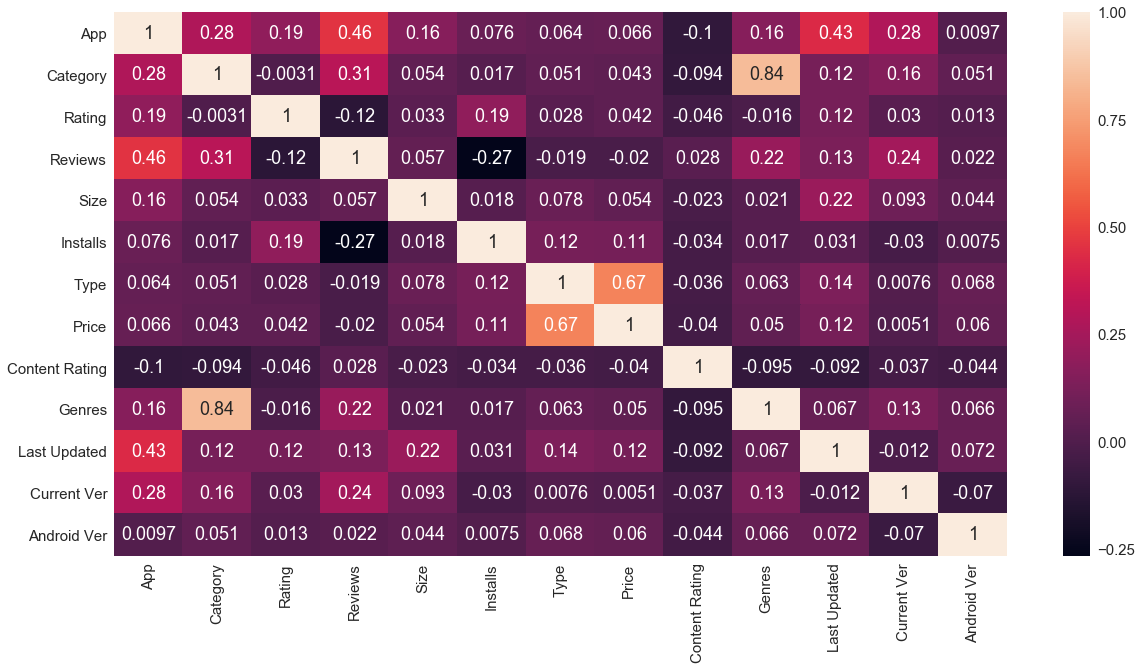

In [61]:
#why using installs for predicting the popularity of the given applicaion 
#df_apps.dtypes
#df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)
corr = df_apps.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

Above, we can see that Installs and Reviews has the strongest inverse correlation. This is reasonable because more reviews are conducted on apps that are the most popular. Since Installs was not correlated to Type, this disproves our intuition that free apps lead to more installs. Since the Installs parameter is independent and not correlated to any other parameters, we must only use Installs to show the popularity of an app. Apps with larger amounts of installs would generate the most revenue. Let's take a look at the Top 40 Apps that businesses should consider signing advertising deals with!

In [21]:
#Extract App, Installs, & Content Rating from df_apps
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
popApps.drop(popApps[popApps['Installs'] == 'Free'].index, inplace = True)

In [22]:
#Remove characters preventing values from being floats and integers
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

In [23]:
popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating']]

,App,Installs,Content Rating
0,Messenger – Text and Video Chat for Free,1000000000,Everyone
1,Google Drive,1000000000,Everyone
2,Instagram,1000000000,Teen
3,Google,1000000000,Everyone
4,Instagram,1000000000,Teen
5,Google+,1000000000,Teen
6,Subway Surfers,1000000000,Everyone 10+
7,Maps - Navigate & Explore,1000000000,Everyone
8,Google,1000000000,Everyone
9,Hangouts,1000000000,Everyone


In order to predict if an app will be successful, we must first determine what shows success. In this case a popular app has a high install value. The way in which we will go about preprocessing the data is by binarizing the Installs column. Anything above 100,000 will be considered equal to 1, and everything below that threshold will be equal to 0. This data split is not symmetric and will cause the model to be biased when predicting popularity of an app. We will pop off the enough values of each group to make a 50-50 training set, and the rest will be used for our test set. Also, we will encode the object labels of desired features.

# Label encoding to change categorical variable :

In [24]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder()
#LabelEncoder. Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode
#target values, i.e. y , and not the input X .
#LabelEncoder
#(popAppsCopy.head())
#IMP:https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [25]:
#fit_transform(y) Fit label encoder and return encoded labels
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category'])
#print(popAppsCopy['Category'].unique())
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating'])
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres'])
popAppsCopy['Type']= label_encoder.fit_transform(popAppsCopy['Type'])
popAppsCopy.dtypes

App                object
Category            int64
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Since the important data is already preprocessed into floats and integers, we can drop the object features and build an 80/20 training/test split.

# Creating Train_and_Test sets :

In [26]:
popAppsCopy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Messenger – Text and Video Chat for Free,6,4.0,56646578,0.0,1000000000,0,0.0,1,34,"August 1, 2018",Varies with device,Varies with device
1,Google Drive,25,4.4,2731171,0.0,1000000000,0,0.0,1,80,"August 6, 2018",Varies with device,Varies with device
2,Instagram,27,4.5,66577313,0.0,1000000000,0,0.0,4,98,"July 31, 2018",Varies with device,Varies with device
3,Google,29,4.4,8033493,0.0,1000000000,0,0.0,1,105,"August 3, 2018",Varies with device,Varies with device
4,Instagram,27,4.5,66509917,0.0,1000000000,0,0.0,4,98,"July 31, 2018",Varies with device,Varies with device


In [27]:
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)

In [28]:
popAppsCopy.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6,4.0,56646578,0.0,1000000000,0,0.0,1,34
1,25,4.4,2731171,0.0,1000000000,0,0.0,1,80
2,27,4.5,66577313,0.0,1000000000,0,0.0,4,98
3,29,4.4,8033493,0.0,1000000000,0,0.0,1,105
4,27,4.5,66509917,0.0,1000000000,0,0.0,4,98


In [29]:
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
#print(type(countPop)
#print(countPop)
#countPop[8]

There are 8892 total rows.


In [30]:
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))

4568 Apps are Popular!
4324 Apps are Unpopular!



In [31]:
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))

For an 80-20 training/test split, we need about 1778.4 apps for testing



In [32]:
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized

In [33]:
popAppsCopy.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6,4.0,56646578,0.0,1,0,0.0,1,34
1,25,4.4,2731171,0.0,1,0,0.0,1,80
2,27,4.5,66577313,0.0,1,0,0.0,4,98
3,29,4.4,8033493,0.0,1,0,0.0,1,105
4,27,4.5,66509917,0.0,1,0,0.0,4,98


In [34]:
print("Cut {} apps off Popular df for a total of 3558 Popular training apps.".format(int(4568*.22132)))
print("Cut {} apps off Unpopular df for a total of 3558 Unpopular training apps.\n".format(int(4324*.17738)))

Cut 1010 apps off Popular df for a total of 3558 Popular training apps.
Cut 766 apps off Unpopular df for a total of 3558 Unpopular training apps.



In [35]:
#sample() is an inbuilt function of random module in Python that returns a particular length list of items chosen 
#from the sequence i.e. list, tuple, string or set. Used for random sampling without replacement.
#https://www.geeksforgeeks.org/python-pandas-dataframe-sample/
#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
#testPop1

In [36]:
popAppsCopy = popAppsCopy.drop(testPop1.index)

In [37]:

print("Values were not dropped from training dataframe.",testPop1.index[0] in popAppsCopy.index)

Values were not dropped from training dataframe. False


In [38]:
testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)

In [39]:
popAppsCopy = popAppsCopy.drop(testPop0.index)

In [40]:
print("Values were not dropped from training dataframe.",testPop0.index[0] in popAppsCopy.index)

Values were not dropped from training dataframe. False


In [41]:
testDf = testPop1.append(testPop0)
trainDf = popAppsCopy

In [42]:
#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

In [43]:
#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()
#(X_train)

In [44]:
X_train = X_train.drop(['Reviews', 'Rating'], axis=1) #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate
X_test = X_test.drop(['Reviews', 'Rating'], axis=1)   #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate

In [45]:
print("{} Apps are used for Training.".format(y_train.count()))
print("{} Apps are used for Testing.".format(y_test.count()))
X_test.head(3)

7116 Apps are used for Training.
1776 Apps are used for Testing.


,Category,Size,Type,Price,Content Rating,Genres
0,11,60000000.0,0,0.0,1,101
1,14,31000000.0,0,0.0,4,0
2,11,48000000.0,0,0.0,1,94


# Fit Data in model :
## The Model 1 - Modelling with Decision Tree Classifier (DTC)

In [46]:
#https://www.geeksforgeeks.org/decision-tree-implementation-python/
#The fit() method takes the training data as arguments, which can be one array in the case of unsupervised learning,
#or two arrays in the case of supervised learning. Note that the model is fitted using X and y , but the object holds 
#no reference to X and y .
popularity_classifier = DecisionTreeClassifier(max_leaf_nodes=29, random_state=0)
#print(popularity_classifier)
popularity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=29,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Predict on Test_Set

In [47]:
#predict() : given a trained model, predict the label of a new set of data. This method accepts one argument,
#the new data X_new (e.g. model. predict(X_new) ), and returns the learned label for each object in the array.
predictions = popularity_classifier.predict(X_test)
#print(type(predictions))
#print(predictions.ndim)
print("Predicted: ",predictions[:30])
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1]


# Measure Accuracy of Classifier

In [48]:
predict =popularity_classifier.predict(X_test)
#print(predict)
#for using the classification_report() we have used from sklearn.metrics import classification_report
#https://www.youtube.com/watch?v=TdkHN_M2KXE
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.65      0.76      0.70       766
          1       0.79      0.69      0.74      1010

avg / total       0.73      0.72      0.72      1776



In [49]:
print("Train Accuracy:",popularity_classifier.score(X_train,y_train))
print("Test Accuracy:",popularity_classifier.score(X_test,y_test))

Train Accuracy: 0.7349634626194491
Test Accuracy: 0.722972972972973


# The Model 2 - Modelling with Random Forest Classifier (R_F)

In [50]:
from sklearn.ensemble import  RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

# Now the time to Evaluate our Model (Accuracy)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[541 225]
 [271 739]]
             precision    recall  f1-score   support

          0       0.67      0.71      0.69       766
          1       0.77      0.73      0.75      1010

avg / total       0.72      0.72      0.72      1776

0.7207207207207207


# Model 3 : Modelling with SVM (Support_Vector_Machine)

In [52]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 1, 0, 0])

# evaluation

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.56      0.78      0.65       766
          1       0.76      0.54      0.63      1010

avg / total       0.68      0.64      0.64      1776

Confusion matrix, without normalization
[[597 169]
 [467 543]]


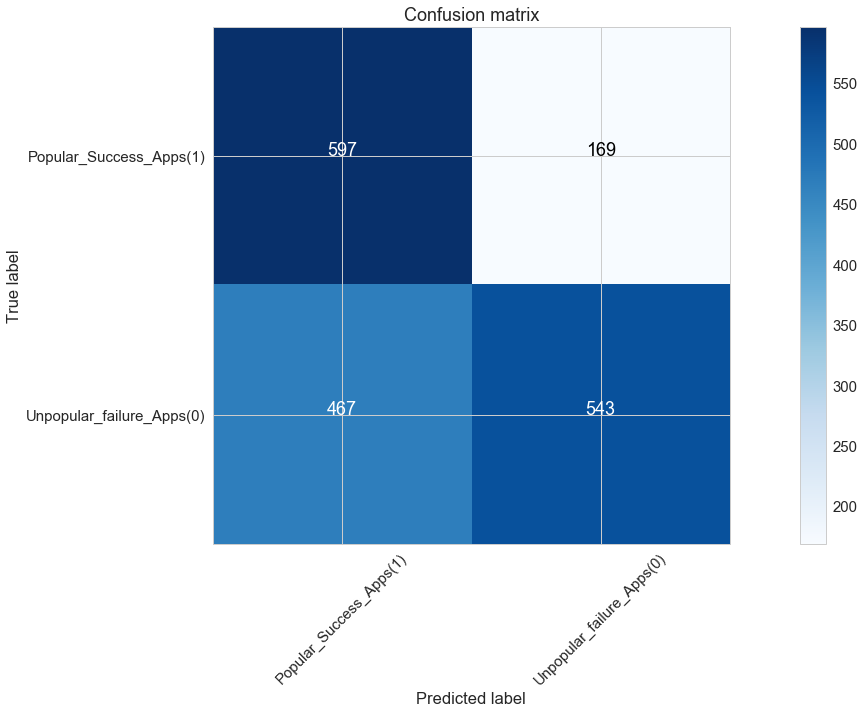

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Popular_Success_Apps(1)','Unpopular_failure_Apps(0)'],normalize= False,  title='Confusion matrix')

In [57]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6418918918918919

Find out what caused higher popularity# 

# Find out what caused higher popularity

If different apps with the same app sizes are compared, we can see that the Category and the Genres columns are the only parameters that differ when determining popularity. Shown below, the 1 in the "Popular?" column may be an outlier, so as a whole, given all columns below, we can predict with ~72% accuracy the success of an app.

In [58]:
X_testCopy = X_test.copy()
X_testCopy["Popular?"] = y_test
X_testCopy[X_test["Size"] == 3600000].head(10)

,Category,Size,Type,Price,Content Rating,Genres,Popular?
112,11,3600000.0,0,0.00,1,50,0
616,12,3600000.0,0,0.00,1,58,0
1297,19,3600000.0,0,0.00,1,68,1
1310,31,3600000.0,0,0.00,4,110,0
1352,23,3600000.0,1,0.99,1,78,0


When running the kernel, the Accuracy of this Decision Tree Classifier will be about 95% (IF INCLUDING REVIEWS & RATINGS). When not including the rating and reviews features, the Classifier has around 72% Accuracy. This shows that given the Size, Type, Price, Content Rating, and Genre of an app, we can predict within 72% certainty if an app will have more than 100,000 installs and be a hit on the Google Play Store.

# Conclusion

1.For Innovation - Developers should focus in on apps with a category of Auto and Vehicles and Entertainment, as there are not many highly rated apps in these categories.

2.For Revenue - Marketers should advertise on the top 40 most installed apps list above, in order to reach the maximum viewing of their advertisements.

3.For Popularity - Everyone building apps should consider that the Category and Genre of an app may strongly dictate if an app will be popular or not. However, the Size, Type, Price, Content Rating, and Genre features should all be used to most accurately determine if an app will gain maximum installs.

4.Overall we can conclude that decision tree model and random forest model are better model than SVM model because of better accuracy and F1 score. 

Thank you everyone !